<a href="https://colab.research.google.com/github/sudeepds/mtech-datascience/blob/main/Group076_KNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02 - Set 02
Dataset : KNN_Project.csv
Group : 076
---
Group Members:

1. ABHIJEET SHARMA - SC202004817

2. JAGATHISHWARAN S - 2020SC04646 

3. SUDEEP GHOSH - 2020SC04781


----
# Import the required libraries.
----


* Importing all the required libraries




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import iqr
from scipy import stats

----
# Build Data Frame
----

### Import Data

In [ ]:
raw_df = pd.read_csv('KNN_Project')

### Print top 10 rows

In [ ]:
raw_df.head(10)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1536.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1113.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1304.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1057.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1023.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
5,1587.993461,667.420121,2072.048544,364.624958,905.011385,2229.178514,880.442566,568.698408,645.719217,2156.949990,1
6,1497.293624,822.435853,908.059366,671.797517,1280.270442,1910.066313,1052.812386,713.757499,703.951632,1088.493788,0
7,1172.820769,1166.958461,455.656588,445.572745,1109.894585,1045.551452,1301.821786,264.940137,945.023932,2307.922229,0
8,839.494647,1089.747059,653.699894,659.334590,1529.725972,1521.320489,1401.676227,433.025043,1289.063583,1690.149835,0
9,1028.689140,202.089774,1030.841860,429.109102,943.104815,1978.506855,653.178512,753.655291,1336.375960,1057.864848,1


### Statistical Description of data

In [ ]:
raw_df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.078157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.841162,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1046.047215,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


### Checking for missing or null values

In [ ]:
raw_df.isna().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

----
# Preprocessing of data
----

### Outlier Treatment
There are two ways to do so,

*   **Using IQR** - In IQR, data points higher than the upper limit and lower than the lower limit are considered outliers
*   **Using Z-score** - If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points therefore can be considered outlier.

In [ ]:
perform_outlier = raw_df.copy()
Q1 = perform_outlier.quantile(0.25)
Q3 = perform_outlier.quantile(0.75)
iqr_values = iqr(perform_outlier, axis=0)

iqr_outlier_removed = perform_outlier[~((perform_outlier< (Q1-1.5*iqr_values)) | (perform_outlier> (Q3+1.5*iqr_values))).any(axis=1)]
iqr_outlier_removed.shape

(983, 11)

In [ ]:
z = np.abs(stats.zscore(raw_df))
ZScore_Outlier_Removed = raw_df[(z<3).all(axis=1)]
ZScore_Outlier_Removed.shape

(992, 11)

Since Z score outlier treatment leads to minimal data loss, we would go ahead with it.

In [ ]:
processed_df = ZScore_Outlier_Removed.copy()

#### Seperate the target variable

In [ ]:
X = processed_df.iloc[:,:-1]
y = processed_df.iloc[:,-1:]

### Normalize the dataset and print 10 rows.

In [ ]:
scaler = StandardScaler()
X.iloc[:] = scaler.fit_transform(X.to_numpy())

#### Check Normalized Values

In [ ]:
X = X.values
X

array([[ 1.2945893 , -0.4387325 ,  1.61876312, ..., -0.93187704,
         1.01150454, -1.06712236],
       [ 0.15377085, -1.05299557,  1.74068689, ..., -0.45777799,
         0.26004847, -1.03911301],
       [ 0.66757634, -0.43226751,  0.77603386, ...,  1.164228  ,
         2.19027107,  0.34171372],
       ...,
       [-0.362124  , -0.97529431,  0.83786169, ..., -1.51772573,
        -0.27443553,  0.86185896],
       [ 0.27146381, -0.98870312,  0.03174757, ..., -0.02928196,
         0.43876104, -0.21213722],
       [ 0.62206553,  0.80208185,  1.12151443, ..., -1.25279332,
        -0.60348366, -0.87783783]])

(array([[  1.,  22.,  98., 176., 204., 209., 160.,  88.,  29.,   5.],
        [  1.,  21.,  96., 183., 204., 207., 144., 103.,  25.,   8.],
        [  0.,  23., 101., 165., 210., 217., 148.,  94.,  28.,   6.],
        [ 11.,  27.,  78., 151., 209., 230., 164.,  95.,  26.,   1.],
        [  5.,  30.,  85., 157., 219., 212., 158.,  95.,  29.,   2.],
        [  8.,  32.,  79., 144., 215., 232., 171.,  82.,  27.,   2.],
        [  4.,  24.,  97., 161., 205., 218., 164.,  81.,  31.,   7.],
        [  0.,  16.,  91., 182., 238., 186., 156.,  75.,  36.,  12.],
        [  1.,  23., 100., 155., 210., 229., 166.,  68.,  35.,   5.],
        [  1.,  30.,  99., 148., 222., 216., 142., 104.,  26.,   4.]]),
 array([-3.03124659, -2.42575912, -1.82027166, -1.21478419, -0.60929672,
        -0.00380925,  0.60167822,  1.20716568,  1.81265315,  2.41814062,
         3.02362809]),
 <a list of 10 Lists of Patches objects>)

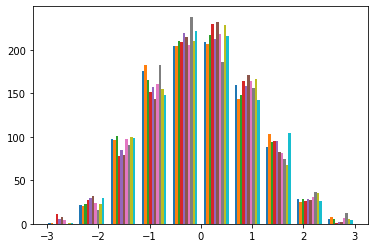

In [ ]:
plt.hist(X)

### Checking correlation between variables and target

In [ ]:
corr_matrix = processed_df.corr()
corr_matrix["TARGET CLASS"]

XVPM           -0.082380
GWYH           -0.421031
TRAT            0.488204
TLLZ           -0.171976
IGGA            0.296380
HYKR           -0.014869
EDFS            0.280603
GUUB           -0.169666
MGJM           -0.098485
JHZC           -0.301143
TARGET CLASS    1.000000
Name: TARGET CLASS, dtype: float64

Text(0.5, 1.0, 'Pearson Correlation')

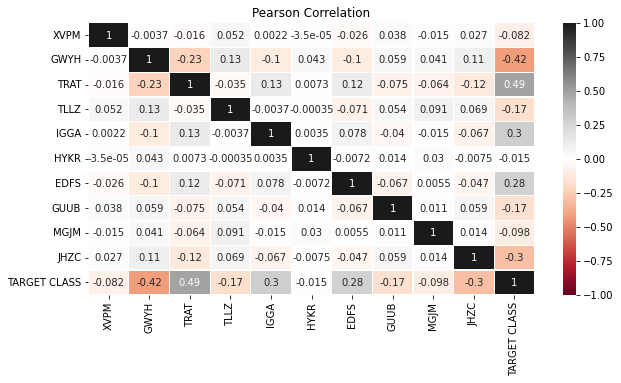

In [ ]:
#correlation analysis
pearsonCorr = processed_df.corr(method='pearson')

fig = plt.subplots(figsize=(10,5))
sns.heatmap(pearsonCorr, vmin=-1, vmax=1, cmap='RdGy', annot = True, linewidth = 0.1)
plt.title('Pearson Correlation')

----
# Train Test Split
----

### Split the data as per 70:30 ratios of training and test set.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

----
# Define a functions to return k- nearest neighbors
----

### Calculating Euclidean distance between vectors

In [ ]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
  # Intitiating distance
	distance = 0.0
  #Iterating through dimensions of vector
	for i in range(len(vector1)):
    #calculating dimensional distance
		distance += (vector1[i] - vector2[i])**2
	return math.sqrt(distance)

### Fetching Neighbors based on Euclidean Distance

In [ ]:
#Function to get the closest neighbors
def get_neighbors(X_train, X_test_row, k):
    #Calculating euclidean distance and storing with row ID
    distances = [(i, euclidean_distance(X_test_row, instance)) for i, instance in enumerate(X_train)]
    #sorting the distances in ascending order
    distances.sort(key=lambda x: x[1])
    #returning row ID of closest K neighbors
    return [i[0] for i in distances[:k]]

#### Testing the neighbor function

In [ ]:
#Using a single row to test the get neighbors function
get_neighbors(X_train, X_train[5], 10)

[5, 47, 380, 583, 451, 412, 335, 573, 595, 667]

### Building the prediction function

In [ ]:
#Function to predict the class for a row based on K nearest neighbors

def predict(neighbor_id, target_class):
    #Dependent variable, class
    target_class = np.array(target_class)

    #Based on row ID fetching the corresponding class of nearest neighbors
    neighbor_class = target_class[neighbor_id]

    #initiating prediction bucket
    prediction_bucket = {}

    #Indexing and counting various classes from K nearest neighbors
    for x in neighbor_class:
        if x[0] in prediction_bucket:
            prediction_bucket[x[0]] += 1
        else:
            prediction_bucket[x[0]] = 1
    
    #Total count of all classes
    total = sum(prediction_bucket.values())

    #Calculating probability for each class from K neighbors
    probability = {k: v/total for k, v in prediction_bucket.items()}
    
    return probability

#### Testing the prediction function

In [ ]:
predict(get_neighbors(X_train, X_train[5], 5), y_train)

{0: 0.4, 1: 0.6}

### Compiling all functions together in a classfier

In [ ]:
#Compiling all classes into a single KNN function
def knn_classifier(X_train, y_train, X_test, k):
    #prediction list
    result = []
    #iterating through test rows and predicting their class based on highest probability
    for vector in X_test:
        neighbor_index = get_neighbors(X_train, vector, k)
        #prediction per row
        prediction = predict(neighbor_index, y_train)

        #fetching the class with highest probability
        result.append(max(prediction, key=prediction.get))
    return np.array(result)

# Test the KNN Algorithm on the test dataset


In [ ]:
#Testing the algorithm on dataset, with K = 20
y_pred = knn_classifier(X_train, y_train, X_test, 20)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

### Calculating Accuracy of the custom KNN classifer

In [ ]:
#flattening the test class labels for consumption
y_test_flatten = y_test.values.flatten()

#### Function to calculate accuracy score

In [ ]:
#accuracy function comparing prediction vs test
def accuracy_score(y_true, y_pred):
    count = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            count += 1
    return count/len(y_true)

#### Calculating accuracy

In [ ]:
print("Custom KNN classifier has the accuracy of : ", round(accuracy_score(y_test_flatten, y_pred), 2))

Custom KNN classifier has the accuracy of :  0.83


In [ ]:
print("Confusion Matrix : \n", confusion_matrix(y_test_flatten, y_pred))

Confusion Matrix : 
 [[127  29]
 [ 23 119]]


In [ ]:
print("Detailed classification report : \n", classification_report(y_test_flatten, y_pred))

Detailed classification report : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       156
           1       0.80      0.84      0.82       142

    accuracy                           0.83       298
   macro avg       0.83      0.83      0.83       298
weighted avg       0.83      0.83      0.83       298



# Repeat the procedure with different values of K and find the best value.

### Function to iterate through a range of K values

In [ ]:
def k_iter(X_train, y_train, X_test, y_test, k_max):
    accuracy = []
    y_t = y_test
    for i in range(1, k_max):
        y_pred = knn_classifier(X_train, y_train, X_test, i)
        accuracy.append(accuracy_score(y_t, y_pred))
    return np.array(accuracy)

### Testing the classifier on various K values

In [ ]:
accuracy = k_iter(X_train, y_train, X_test, y_test_flatten, 50)
accuracy

array([0.73825503, 0.73825503, 0.79530201, 0.79865772, 0.80536913,
       0.81879195, 0.81543624, 0.81208054, 0.80872483, 0.81208054,
       0.80201342, 0.80872483, 0.80536913, 0.81543624, 0.81543624,
       0.81543624, 0.81879195, 0.82214765, 0.80201342, 0.82550336,
       0.81208054, 0.81543624, 0.79865772, 0.78187919, 0.79194631,
       0.80201342, 0.80536913, 0.80536913, 0.80201342, 0.80536913,
       0.80536913, 0.79865772, 0.80536913, 0.80201342, 0.79530201,
       0.7885906 , 0.79530201, 0.79530201, 0.7885906 , 0.7885906 ,
       0.79530201, 0.79194631, 0.79194631, 0.7885906 , 0.79530201,
       0.79865772, 0.79865772, 0.79865772, 0.79530201])

In [ ]:
print("Peak accuracy is " , max(accuracy), " for value of K = ", np.where(accuracy ==  max(accuracy))[0][0] + 1)


Peak accuracy is  0.825503355704698  for value of K =  20


### Plotting K Value vs Accuracy

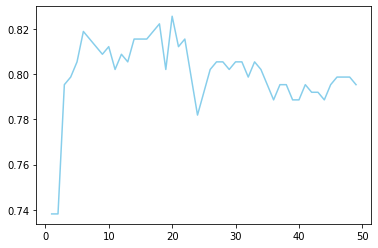

In [ ]:
x_plot = np.arange(1, 50)
y_plot = accuracy

plt.plot(x_plot, y_plot, color="skyblue")
plt.show()

From the data above it could be concluded the optimal K value is 20. 

----
# Comparing with sklearn
----

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))


[[127  29]
 [ 28 114]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       156
           1       0.80      0.80      0.80       142

    accuracy                           0.81       298
   macro avg       0.81      0.81      0.81       298
weighted avg       0.81      0.81      0.81       298



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


sklearn has an accuracy of 0.81, whereas our classifer has an accuracy of 0.83